#**Suicide Trend Analysis**
**Data Dictionary:**


1.   Country
2.   Year
3.   Sex
4.   Age
5.   Number of Suicides
6.   Population
7.   Country-year
8.   HDI for year
9.   GDP for year
10   GDP per capita
11   Generation



In [67]:
# Load library or package
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [68]:
df = pd.read_csv('../content/master.csv')

In [69]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [70]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [71]:
df.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
 gdp_for_year            0
gdp_per_capita           0
generation               0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [73]:
df.drop('gdp_per_capita', axis=1, inplace=True)

In [74]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",Boomers


In [75]:
df[' gdp_for_year'] = df[' gdp_for_year'].str.replace(",","").astype(float)

In [76]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,Boomers


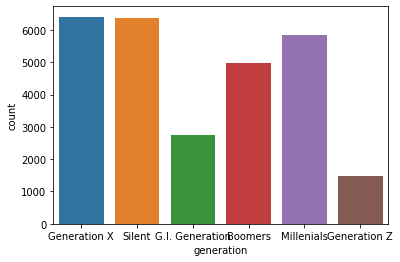

In [77]:
sns.countplot(df['generation'])

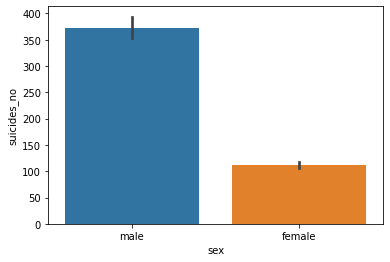

In [78]:
sns.barplot(x=df.sex, y=df.suicides_no, data= df)

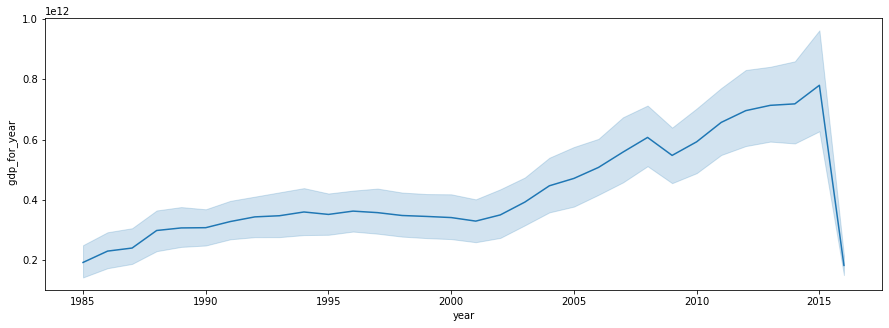

In [79]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year',y=' gdp_for_year', data = df)

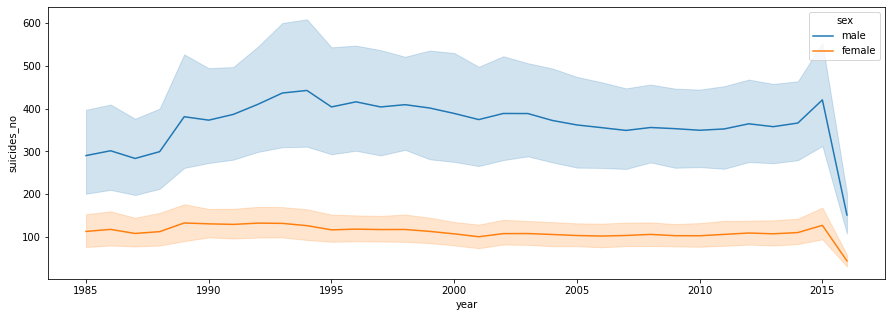

In [80]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year',y='suicides_no', hue='sex', data = df)

In [85]:
from sklearn.preprocessing import LabelEncoder
labelEncoder     = LabelEncoder()
df['sex']        = labelEncoder.fit_transform(df['sex'])
df['generation'] = labelEncoder.fit_transform(df['generation'])

In [86]:
df = df.fillna(0)

In [89]:
df.head()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,generation
0,1987,1,21,312900,6.71,0.0,2.156625e+09,2
1,1987,1,16,308000,5.19,0.0,2.156625e+09,5
2,1987,0,14,289700,4.83,0.0,2.156625e+09,2
3,1987,1,1,21800,4.59,0.0,2.156625e+09,1
4,1987,1,9,274300,3.28,0.0,2.156625e+09,0


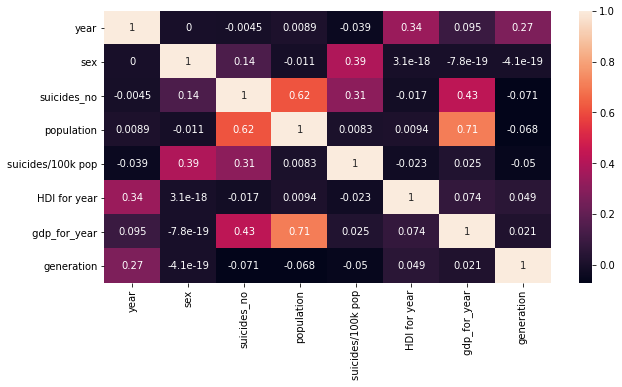

In [94]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)

In [93]:
X = df.drop('suicides_no', axis=1)
y = df['suicides_no']

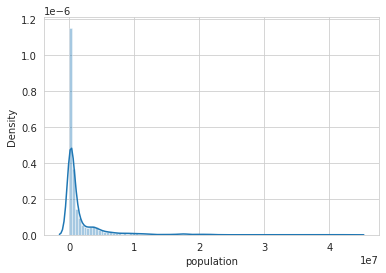

In [99]:
sns.set_style('whitegrid')
sns.distplot(df['population'], bins=100)

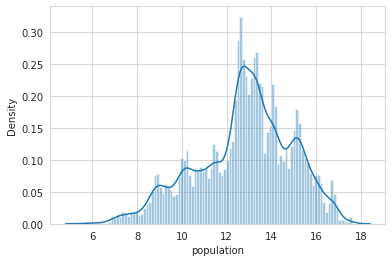

In [100]:
sns.set_style('whitegrid')
sns.distplot(np.log(df['population']), bins=100)

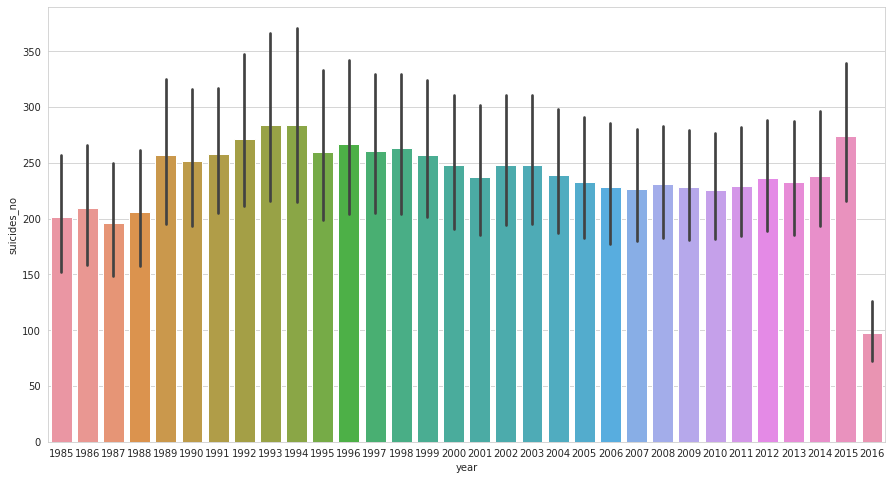

In [104]:
plt.figure(figsize=(15,8))
sns.barplot(x='year', y='suicides_no', data=df)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=5)

In [117]:
from sklearn.linear_model  import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [120]:
randomForest = RandomForestRegressor()
randomForest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [121]:
decisionTree = DecisionTreeRegressor()
decisionTree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [123]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
supportVector = SVR()
supportVector.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [125]:
y_pred_1 = linear.predict(X_test)
y_pred_2 = randomForest.predict(X_test)
y_pred_3 = decisionTree.predict(X_test)
y_pred_4 = supportVector.predict(X_test)

In [128]:
from sklearn import metrics
print("Linear Regression RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))
print("Random Forest RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred_2)))
print("Decision Tree RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred_3)))
print("SVR RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred_4)))

Linear Regression RMSE : 698.2379605997588
Random Forest RMSE : 61.401691757401764
Decision Tree RMSE : 100.56378635378032
SVR RMSE : 928.8721615294644
